In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import geopandas as gpd
import folium as fl
from shapely.geometry import Point
from shapely.geometry import Polygon


In [10]:
data_distritos_csv = pd.read_csv('barrios/distritos_descentralizados_json.csv')
distritos = gpd.read_file('barrios/distritos_descentralizados.gml')

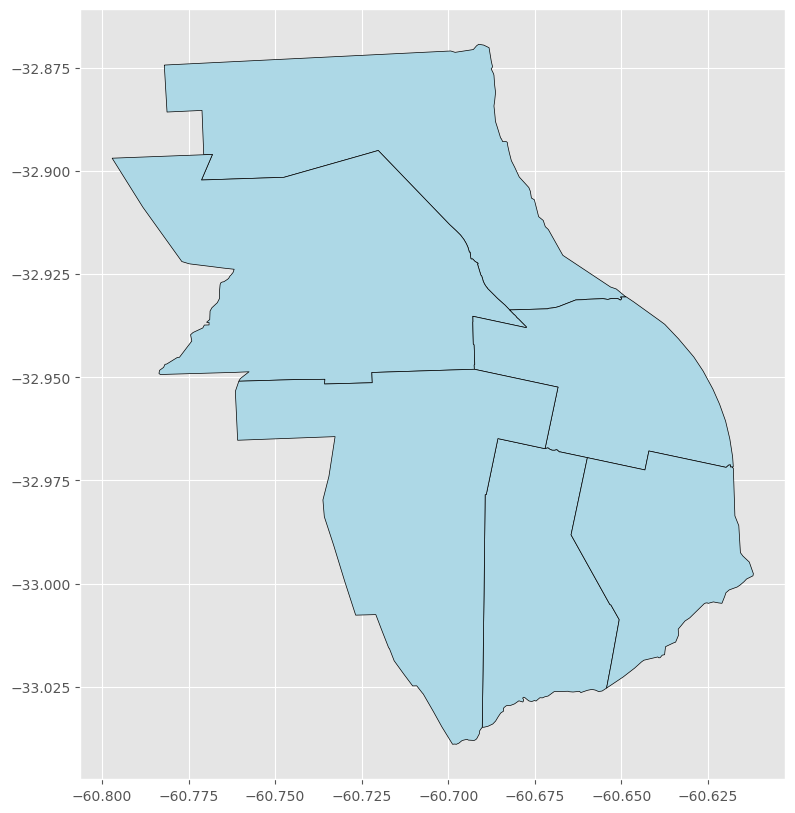

In [11]:
distritos.plot(color='lightblue', edgecolor='black', figsize=(10,10))
plt.show()

In [13]:
data = pd.read_excel('rosario f.xlsx')

In [15]:
from shapely.geometry import Point
from shapely.geometry import Polygon

In [17]:
data.columns

Index(['interview__key', 'METODO', 'Coord1__Latitude', 'Coord1__Longitude',
       'EDAD', 'GENERO', 'INT DE VOTO X ESPACIO', 'RADIO'],
      dtype='object')

In [18]:
#distritos y data. para ubicar encuestados en distritos
data['geometry'] = data.apply(lambda row: Point(row['Coord1__Longitude'], row['Coord1__Latitude']), axis=1)
data_geo = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # Ajusta el CRS si es necesario

# 3. Asegurarse de que ambos GeoDataFrames tengan el mismo CRS
if data_geo.crs != distritos.crs:
    data_geo = data_geo.to_crs(distritos.crs)

# 4. Realizar la unión espacial y crear el GeoDataFrame resultante llamado data_distritos
data_distritos = gpd.sjoin(data_geo, distritos, how="left", predicate="within")

# Verificar el resultado
print(data_distritos.head())

  interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0    56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1    67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2    24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3    84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4    21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   

      GENERO INT DE VOTO X ESPACIO      RADIO                     geometry  \
0  Masculino           LIBERTARIOS  820840409  POINT (-60.69527 -32.88146)   
1  Masculino                 OTROS  820840410  POINT (-60.69357 -32.88226)   
2   Femenino                 OTROS  820840502  POINT (-60.69288 -32.88473)   
3  Masculino           LIBERTARIOS  820840502  POINT (-60.69346 -32.88467)   
4   Femenino        NINGUNO/NOSABE  820841013  POINT (-60.70363 -32.91883)   

   index_right                        gml_id  DISTRITO  \
0          0.0  distritos_de

In [19]:
data_distr_df = data_distritos.drop(columns='geometry').copy()
data_distr_df.head()

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO,index_right,gml_id,DISTRITO,OBSERVACIO
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409,0.0,distritos_descentralizados.1,NORTE,Villa Hortencia
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410,0.0,distritos_descentralizados.1,NORTE,Villa Hortencia
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502,0.0,distritos_descentralizados.1,NORTE,Villa Hortencia
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502,0.0,distritos_descentralizados.1,NORTE,Villa Hortencia
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013,1.0,distritos_descentralizados.2,NOROESTE,Olga y Leticia Cossettini


In [20]:
data_distr_df.columns = [name.lower() for name in data_distr_df.columns]
data_distr_df.head()
data_distr_df.rename(columns={'int de voto x espacio': 'intencion'}, inplace=True)
print(data_distr_df.columns)

Index(['interview__key', 'metodo', 'coord1__latitude', 'coord1__longitude',
       'edad', 'genero', 'intencion', 'radio', 'index_right', 'gml_id',
       'distrito', 'observacio'],
      dtype='object')


In [22]:
intencion_distrito = data_distr_df.groupby('distrito')['intencion'].value_counts().unstack(fill_value=0)
print(intencion_distrito)

intencion  FIT  FdT  JxC  LIBERTARIOS  NINGUNO/NOSABE  OTROS  PNK
distrito                                                         
CENTRO       7   24   30           18              25     10    3
NOROESTE     0   11   10            6              11      4    3
NORTE        2   10   12            7               7      4    4
OESTE        1   16   13           11              13      3    6
SUDOESTE     0    9    7            6               3      6    4
SUR          0    4    8            2               6      0    2


In [35]:
# Calcular nuevamente la columna 'total', excluyendo la columna existente 'total'
intencion_distrito = intencion_distrito.drop(columns=['total'])
print(intencion_distrito)


intencion  FIT  FdT  JxC  LIBERTARIOS  NINGUNO/NOSABE  OTROS  PNK  total2
distrito                                                                 
CENTRO       7   24   30           18              25     10    3     117
NOROESTE     0   11   10            6              11      4    3      45
NORTE        2   10   12            7               7      4    4      46
OESTE        1   16   13           11              13      3    6      63
SUDOESTE     0    9    7            6               3      6    4      35
SUR          0    4    8            2               6      0    2      22
